In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

In [20]:
# ROC: Receiver Operating Characteristic

# It's a graph that shows how good a model is at distinguishing between two classes
# Instead of fixing one threshold (0.5), we test all possible thresholds from 0 to 1

'''
x-axis = FPR (False Positive Rate)
Formula: FP / (FP + TN)

How many of the actual negative did we mistakenly called positive

y-axis = TPR (True Positive Rate) = Recall
Formula = TP / (TP + FN)
How many of the actual positives did we correctly catch?

higher threshold = high precision and low recall
lower threshold = low precision and high recall
'''

'\nx-axis = FPR (False Positive Rate)\nFormula: FP / (FP + TN)\n\nHow many of the actual negative did we mistakenly called positive\n\ny-axis = TPR (True Positive Rate) = Recall\nFormula = TP / (TP + FN)\nHow many of the actual positives did we correctly catch?\n\nhigher threshold = high precision and low recall\nlower threshold = low precision and high recall\n'

In [21]:
y_true = [1,1,0,1,0,1,0,0,1,0]  # True Labels
y_scores = [0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.4, 0.3, 0.2, 0.1] # Model Scores

### ROC (Receiver Operating Characteristic) Curve:
- Plots the trade-off between:<br>
• True Positive Rate (TPR) = TP / (TP + FN)<br>
• False Positive Rate (FPR) = FP / (FP + TN)<br>

- Each point on the curve represents a TPR and FPR for a specific threshold.

As the threshold decreases, more samples are predicted True,
increasing both TPR and FPR.

### AUC (Area Under the Curve):
- Represents the overall ability of the model to distinguish between classes.<br>
• AUC = 1.0 → Perfect model<br>
• AUC = 0.5 → Random guessing

In [22]:
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc_score = roc_auc_score(y_true, y_scores)

print("fpr--> ",fpr)
print("tpr--> ",tpr)
print("thresholds--> ",thresholds)

fpr-->  [0.  0.  0.  0.2 0.2 0.4 0.4 0.8 0.8 1. ]
tpr-->  [0.  0.2 0.4 0.4 0.6 0.6 0.8 0.8 1.  1. ]
thresholds-->  [ inf 0.95 0.9  0.85 0.8  0.7  0.6  0.3  0.2  0.1 ]


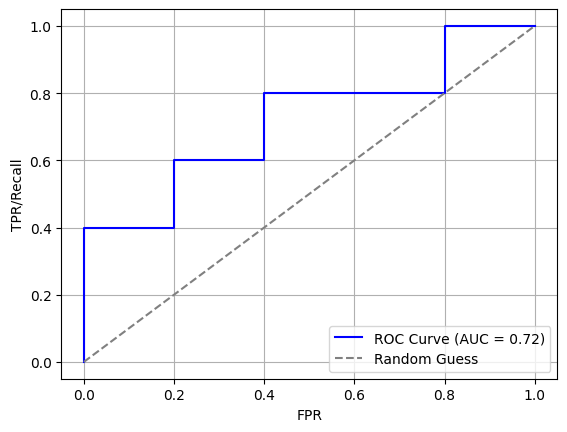

In [23]:
# Plot ROC curve
plt.Figure(figsize=(5,5))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color='grey', linestyle="--", label="Random Guess")
plt.xlabel("FPR")
plt.ylabel("TPR/Recall")
plt.legend(loc="lower right")
plt.grid(True)

In [24]:
# Print threshold values for better understanding
for i in range(len(thresholds)):
    print(f"thresholds: {thresholds[i]} | FPR: {fpr[i]} | TPR: {tpr[i]}")

thresholds: inf | FPR: 0.0 | TPR: 0.0
thresholds: 0.95 | FPR: 0.0 | TPR: 0.2
thresholds: 0.9 | FPR: 0.0 | TPR: 0.4
thresholds: 0.85 | FPR: 0.2 | TPR: 0.4
thresholds: 0.8 | FPR: 0.2 | TPR: 0.6
thresholds: 0.7 | FPR: 0.4 | TPR: 0.6
thresholds: 0.6 | FPR: 0.4 | TPR: 0.8
thresholds: 0.3 | FPR: 0.8 | TPR: 0.8
thresholds: 0.2 | FPR: 0.8 | TPR: 1.0
thresholds: 0.1 | FPR: 1.0 | TPR: 1.0


In [25]:
"""
Precision vs Recall Example (Logistic Regression)

A logistic regression model outputs probabilities (0–1).
To classify, we set a threshold (default = 0.5):

Probability ≥ threshold → Predict True
Probability < threshold → Predict False

Metrics:
Recall = TP / (TP + FN) → Out of all actual positive samples, how many were correctly predicted.
Precision = TP / (TP + FP) → Out of all samples predicted as positive, how many were actually positive.

Example:
10 patients → 5 sick (True), 5 healthy (False)

Case 1: High threshold (0.9)
TP=2, FP=0 → Recall=0.4, Precision=1.0
→ Few detected, but all correct.

Case 2: Low threshold (0.1)
TP=5, FP=5 → Recall=1.0, Precision=0.5
→ All detected, but many false alarms.

Lower threshold → higher recall, lower precision.
Higher threshold → higher precision, lower recall.
"""

'\nPrecision vs Recall Example (Logistic Regression)\n\nA logistic regression model outputs probabilities (0–1).\nTo classify, we set a threshold (default = 0.5):\n\nProbability ≥ threshold → Predict True\nProbability < threshold → Predict False\n\nMetrics:\nRecall = TP / (TP + FN) → Out of all actual positive samples, how many were correctly predicted.\nPrecision = TP / (TP + FP) → Out of all samples predicted as positive, how many were actually positive.\n\nExample:\n10 patients → 5 sick (True), 5 healthy (False)\n\nCase 1: High threshold (0.9)\nTP=2, FP=0 → Recall=0.4, Precision=1.0\n→ Few detected, but all correct.\n\nCase 2: Low threshold (0.1)\nTP=5, FP=5 → Recall=1.0, Precision=0.5\n→ All detected, but many false alarms.\n\nLower threshold → higher recall, lower precision.\nHigher threshold → higher precision, lower recall.\n'